In [2]:
import os
for dirname, _, filenames in os.walk('\kaggle\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#%%bash
#!pip install librosa

In [4]:
# Install a pip package in the current Jupyter kernel

#import sys
#!{sys.executable} -m pip install librosa
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install plotly

In [5]:
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [6]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [7]:
#%bash
#ls
#ls

In [8]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install p7zip
!apt-get install -y p7zip-full
!7z x ../input/tensorflow-speech-recognition-challenge/train.7z

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 1522 kB of archives.
After this operation, 5755 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 p7zip amd64 16.02+dfsg-6 [358 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 p7zip-full amd64 16.02+dfsg-6 [1164 kB]
Fetched 1522 kB in 0s (6338 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package p7zip.
(Reading database ... 100572 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-6_amd64.deb ...
Unpacking p7zip (16.02+dfsg-6) ...
Selecting previously unselected package p7zip-full.
Preparing to

      0% 38 - train/audio/_background_noise_/doing_the_dishes.wa                                                              0% 40 - train/audio/_background_noise_/exercise_bike.w                                                          0% 41 - train/audio/_background_noise_/pink_noise.wa                                                        0% 42 - train/audio/_background_noise_/running_tap.w                                                        0% 104 - train/audio/bed/0c2d2ffa_nohash_0.w                                                0% 218 - train/audio/bed/1afd49bf_nohash_1.w                                                1% 312 - train/audio/bed/2d82a556_nohash_1.w                                                1% 438 - train/audio/bed/41474817_nohash_0.w                                                1% 556 - train/audio/bed/541e4079_nohash_0.w                                                1% 672 - train/audio/bed/650daf8e_nohash_1.w                                          

                                                 14% 9249 - train/audio/down/f816db77_nohash_0.w                                                 14% 9359 - train/audio/eight/037c445a_nohash_0.wa                                                   15% 9510 - train/audio/eight/18a8f03f_nohash_0.wa                                                   15% 9659 - train/audio/eight/2903efb3_nohash_1.wa                                                   15% 9793 - train/audio/eight/38d78313_nohash_2.wa                                                   15% 9942 - train/audio/eight/483e2a6f_nohash_1.wa                                                   16% 10075 - train/audio/eight/5a9f7324_nohash_0.w                                                   16% 10210 - train/audio/eight/682e1687_nohash_2.w                                                   16% 10358 - train/audio/eight/75915c90_nohash_0.w                                                   16% 10490 - train/audio/eight/826268f8_nohash_1.w      

                                                 28% 18319 - train/audio/go/cd85758f_nohash_1.wa                                                 28% 18416 - train/audio/go/d933bf5e_nohash_0.wa                                                 29% 18536 - train/audio/go/e41e41f7_nohash_1.wa                                                 29% 18643 - train/audio/go/f17be97f_nohash_3.wa                                                 29% 18750 - train/audio/go/fb7cfe0e_nohash_1.wa                                                 29% 18883 - train/audio/happy/14872d06_nohash_0.w                                                   29% 18983 - train/audio/happy/2151b09a_nohash_1.w                                                   29% 19066 - train/audio/happy/3006c271_nohash_0.w                                                   30% 19183 - train/audio/happy/3efef882_nohash_1.w                                                   30% 19284 - train/audio/happy/4f256313_nohash_1.w                     

                                                   42% 27584 - train/audio/nine/8781f4c1_nohash_0.wa                                                   43% 27683 - train/audio/nine/92a9c5e6_nohash_1.wa                                                   43% 27795 - train/audio/nine/9db2bfe9_nohash_2.wa                                                   43% 27914 - train/audio/nine/ab5d7179_nohash_4.wa                                                   43% 28035 - train/audio/nine/b87bdb22_nohash_3.wa                                                   43% 28162 - train/audio/nine/c1d39ce8_nohash_8.wa                                                   43% 28276 - train/audio/nine/cb8f8307_nohash_4.wa                                                   44% 28393 - train/audio/nine/d9d6559e_nohash_0.wa                                                   44% 28508 - train/audio/nine/e54a0f16_nohash_0.wa                                                   44% 28626 - train/audio/nine/f3210686_nohash_0.w

                                                 57% 37150 - train/audio/one/96a48d28_nohash_1.w                                                 57% 37226 - train/audio/one/9cde5de8_nohash_0.w                                                 57% 37309 - train/audio/one/a996cf66_nohash_0.w                                                 57% 37393 - train/audio/one/b21f0fa4_nohash_2.w                                                 58% 37441 - train/audio/one/b6091c84_nohash_1.w                                                 58% 37510 - train/audio/one/bbbf4fbd_nohash_1.w                                                 58% 37586 - train/audio/one/c1b7c224_nohash_1.w                                                 58% 37674 - train/audio/one/c9b653a0_nohash_0.w                                                 58% 37771 - train/audio/one/d1a17cbe_nohash_3.w                                                 58% 37872 - train/audio/one/dca2797e_nohash_2.w                                        

                                                 71% 46066 - train/audio/six/9a69672b_nohash_3.w                                                 71% 46182 - train/audio/six/a8ee11c7_nohash_2.w                                                 71% 46289 - train/audio/six/b4aa9fef_nohash_4.w                                                 71% 46397 - train/audio/six/bf70feda_nohash_0.w                                                 71% 46499 - train/audio/six/c71e3acc_nohash_0.w                                                 72% 46602 - train/audio/six/cf8d91cf_nohash_1.w                                                 72% 46717 - train/audio/six/dca2797e_nohash_3.w                                                 72% 46813 - train/audio/six/e7d0eb3f_nohash_0.w                                                 72% 46926 - train/audio/six/f3957e23_nohash_0.w                                                 72% 47025 - train/audio/six/fda46b78_nohash_0.w                                        

                                                 84% 54854 - train/audio/two/96d5276f_nohash_0.w                                                 84% 54972 - train/audio/two/a243fcc2_nohash_0.w                                                 85% 55087 - train/audio/two/af30314d_nohash_0.w                                                 85% 55212 - train/audio/two/b9f46737_nohash_3.w                                                 85% 55334 - train/audio/two/c4cfbe43_nohash_0.w                                                 85% 55462 - train/audio/two/d0faf7e4_nohash_4.w                                                 85% 55580 - train/audio/two/dca2797e_nohash_4.w                                                 86% 55697 - train/audio/two/eb0676ec_nohash_0.w                                                 86% 55785 - train/audio/two/f34e6f44_nohash_0.w                                                 86% 55891 - train/audio/two/fffcabd1_nohash_0.w                                        

                                                   99% 64418 - train/audio/zero/da1d320c_nohash_0.wa                                                   99% 64530 - train/audio/zero/e54a0f16_nohash_2.wa                                                   99% 64641 - train/audio/zero/f264e0df_nohash_0.wa                                                   99% 64742 - train/audio/zero/fd395b74_nohash_2.wa                                                  Everything is Ok

Folders: 33
Files: 64732
Size:       2055161498
Compressed: 1121103842


In [9]:
train_audio_path = '../input/tensorflow-speech-recognition-challenge/train/audio/'

In [10]:
train_audio_path = 'train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
print(sample_rate)
print(len(samples))

16000
16000


In [11]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)
np.array(samples, dtype='float64')

16000


array([ 14.,  -7., -14., ...,  19.,  20.,  27.])

In [12]:
samples=np.array(samples, dtype='float64')

samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [13]:

labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

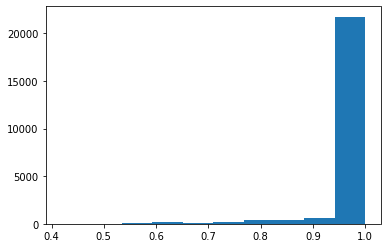

In [14]:

duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [15]:
train_audio_path = 'train/audio/'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [17]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [18]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [19]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [20]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.2)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.2)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [22]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.00001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
533/533 [==============================] - 9s 9ms/step - loss: 2.3008 - accuracy: 0.1086 - val_loss: 2.2960 - val_accuracy: 0.1321
Epoch 2/100
533/533 [==============================] - 4s 8ms/step - loss: 2.2921 - accuracy: 0.1269 - val_loss: 2.2864 - val_accuracy: 0.1393
Epoch 3/100
533/533 [==============================] - 5s 9ms/step - loss: 2.2793 - accuracy: 0.1362 - val_loss: 2.2713 - val_accuracy: 0.1468
Epoch 4/100
533/533 [==============================] - 4s 7ms/step - loss: 2.2649 - accuracy: 0.1494 - val_loss: 2.2479 - val_accuracy: 0.1621
Epoch 5/100
533/533 [==============================] - 4s 7ms/step - loss: 2.2388 - accuracy: 0.1635 - val_loss: 2.2006 - val_accuracy: 0.1823
Epoch 6/100
533/533 [==============================] - 4s 8ms/step - loss: 2.2005 - accuracy: 0.1785 - val_loss: 2.1427 - val_accuracy: 0.1985
Epoch 7/100
533/533 [==============================] - 4s 8ms/step - loss: 2.1544 - accuracy: 0.1915 - val_loss: 2.1032 - val_accuracy: 0.2275

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 

pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 

pyplot.legend()
pyplot.show()

In [ ]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
project_name="Speech_Classification_using_CNN"

In [ ]:
jovian.commit(project=project_name, environment=None)